<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [11]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [12]:
# Answer:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

#### Calculate the average movie duration.

In [40]:
# Answer:
movies.loc[:, 'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [24]:
# Answer:
print(movies.loc[:, 'duration'].sort_values().head(1))
print(movies.loc[:, 'duration'].sort_values().tail(1))

389    64
Name: duration, dtype: int64
476    242
Name: duration, dtype: int64


#### Create a histogram of duration, choosing an "appropriate" number of bins.

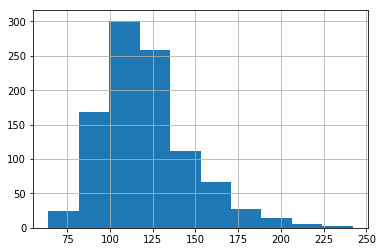

In [39]:
# Answer:
movies.loc[:, 'duration'].hist(bins=10);

#### Use a box plot to display that same data.

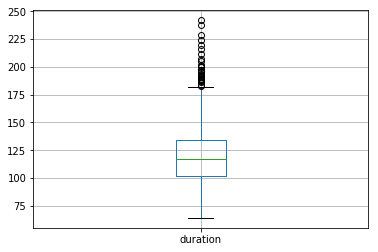

In [43]:
# Answer:
movies.loc[:, ['duration']].boxplot()

## Intermediate level

#### Count how many movies have each of the content ratings.

In [51]:
# Answer:
movies.loc[:, 'content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5,1,'Content ratings')

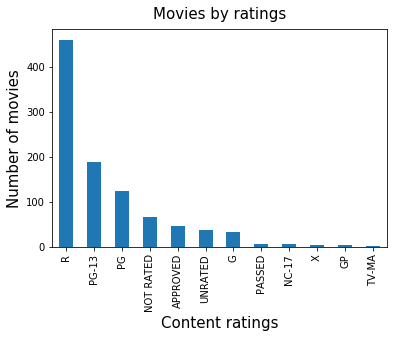

In [123]:
# Answer:
movies = pd.read_csv('./data/imdb_1000.csv')
#store the dataframe in a variable 'ratings'
ratings = movies.loc[:, 'content_rating'].value_counts().plot(kind='bar')
ratings.set_title('Movies by ratings', fontsize=15, y = 1.02)
ratings.set_ylabel('Number of movies', fontsize=15, x = 1)
ratings.set_xlabel('Content ratings', fontsize=15, y = 1)

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

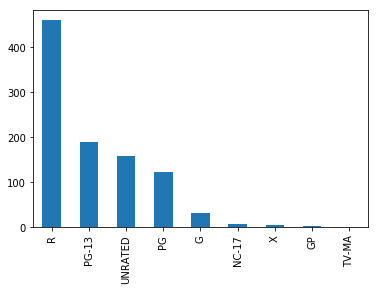

In [66]:
#Answer
movies = pd.read_csv('./data/imdb_1000.csv')
#use replace argument for the conversion
movies['content_rating'].replace(('NOT RATED', 'APPROVED', 'PASSED'), 'UNRATED', inplace=True)
#plot as bar to see if it works
movies.loc[:,'content_rating'].value_counts().plot(kind='bar');

#### Convert the following content ratings to "NC-17": X, TV-MA.

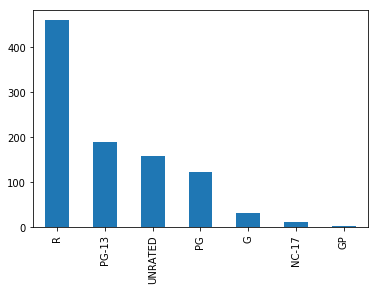

In [67]:
# Answer:
movies['content_rating'].replace(('X', 'TV-MA'), 'NC-17', inplace=True)
#use bar plot to check if the code works
movies.loc[:,'content_rating'].value_counts().plot(kind='bar');

#### Count the number of missing values in each column.

In [68]:
# Answer:
# use isnull() to find out the missing data
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [69]:
# Answer:
#display the rows contains missing data
movies.loc[movies.loc[:,'content_rating'].isnull(), :]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [6]:
#fill the missing data with proper ratings
movies.loc[187, 'content_rating']='PG'
movies.loc[649, 'content_rating']='PG'
movies.loc[936, 'content_rating']='PG-13'

In [7]:
#doublecheck if the missing data is gone
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [71]:
# Answer:
#using >= 120 and <120 to filter the movies
print(movies.loc[movies['duration']>= 120, 'star_rating'].mean())
print(movies.loc[movies['duration']< 120, 'star_rating'].mean())

7.948898678414082
7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

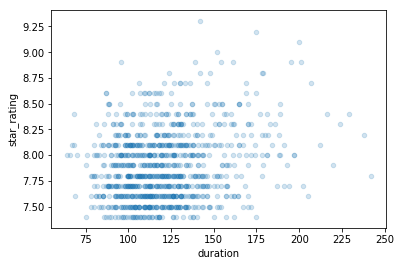

In [156]:
# Answer:
movies.plot(kind='scatter', x='duration', y='star_rating', alpha=0.2);
#Most of the duration of the movies are 100-125 min long with average 8 star_rating, no significant relationship is observed 

#### Calculate the average duration for each genre.

In [161]:
# Answer:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

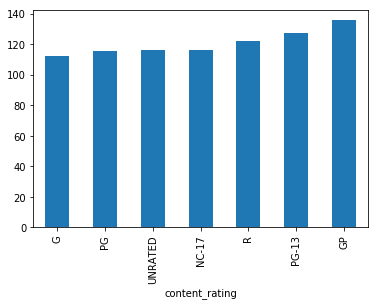

In [72]:
# Answer:
# I listed out the average duration for each rating, and plotted as bar graph.
# Movies with GP rating has the highest averaging duration
movies.groupby('content_rating')['duration'].mean().sort_values().plot(kind='bar')

#### Determine the top rated movie (by star rating) for each genre.

In [25]:
# Answer:
# Use groupby to determine the highest rated movie
movies.groupby('genre')['star_rating', 'title'].max()


,star_rating,title
genre,,
Action,9.0,Yojimbo
Adventure,8.9,True Grit
Animation,8.6,Wreck-It Ralph
Biography,8.9,Walk the Line
Comedy,8.6,Zombieland
Crime,9.3,Zodiac
Drama,8.9,Zulu
Family,7.9,Willy Wonka & the Chocolate Factory
Fantasy,7.7,The City of Lost Children


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [10]:
# Answer:
# Use duplicated to check, sum() to give the total number
print(movies['title'].duplicated().sum())
movies[movies['title'].duplicated()]

4


,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

#### Option 4: aggregate by count and mean, then filter using the count

In [39]:
# Answer:
# First get the count and mean, then I aggregate them into a new dataframe
x=movies.groupby('genre')['star_rating'].mean()
y=movies.groupby('genre')['star_rating'].count()
filted_genres=pd.DataFrame(x)
filted_genres['count']=y
# Use this new DataFrame, I did the filtering
filted_genres.loc[filted_genres['count']>=10, :]

,star_rating,count
genre,,
Action,7.884559,136
Adventure,7.933333,75
Animation,7.914516,62
Biography,7.862338,77
Comedy,7.822436,156
Crime,7.916935,124
Drama,7.902518,278
Horror,7.806897,29
Mystery,7.975000,16


## Bonus

#### Figure out something "interesting" using the actors data!